<a href="https://colab.research.google.com/github/FRED984/Cat_VS_Dog/blob/main/dogvscat_CNN_classifier_transfertLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow.keras

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 3s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

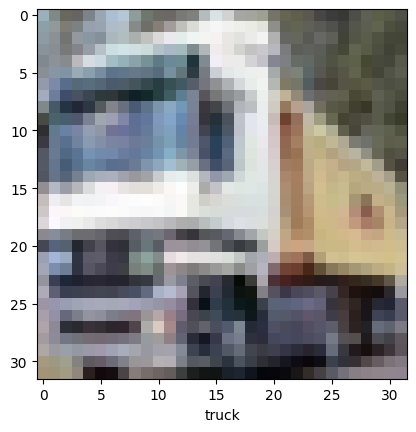

In [ ]:
IMG_INDEX = 1

plt.imshow(train_images[IMG_INDEX] , cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5170 - accuracy: 0.4447 - val_loss: 1.2690 - val_accuracy: 0.5451
Epoch 2/10
1563/1563 [==============================] - 132s 84ms/step - loss: 1.1426 - accuracy: 0.5942 - val_loss: 1.0403 - val_accuracy: 0.6288
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9945 - accuracy: 0.6511 - val_loss: 1.0115 - val_accuracy: 0.6487
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8934 - accuracy: 0.6863 - val_loss: 0.9035 - val_accuracy: 0.6883
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8223 - accuracy: 0.7115 - val_loss: 0.8776 - val_accuracy: 0.6993
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7683 - accuracy: 0.7295 - val_loss: 0.8752 - val_accuracy: 0.7019
Epoch 7/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7259 - accuracy: 0.7481 - val_loss: 0.9019 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9084 - accuracy: 0.7004 - 4s/epoch - 12ms/step
0.7003999948501587


Image Data augmentation

<function matplotlib.pyplot.show(close=None, block=None)>

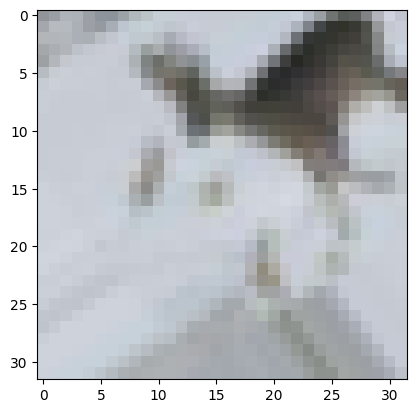

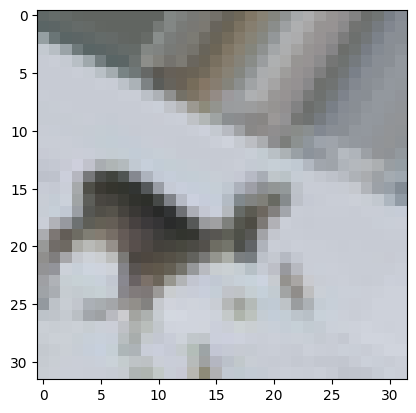

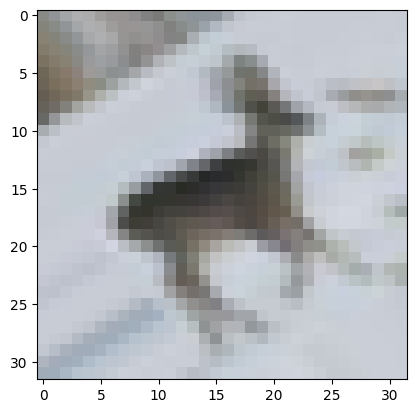

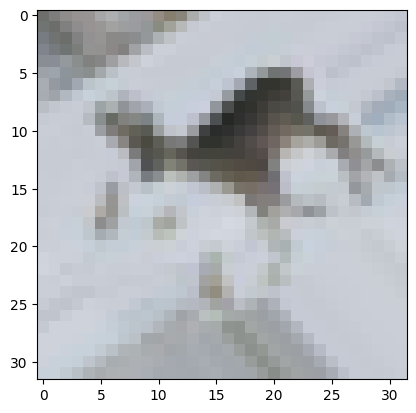

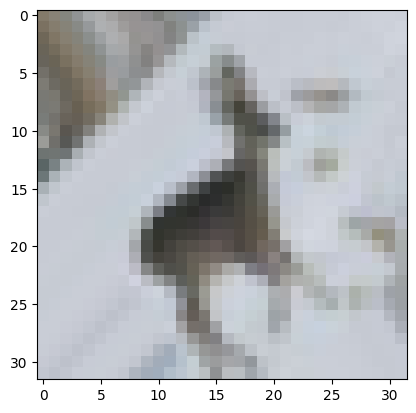

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#Create a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# pick An image to transfor
test_img = train_images[20]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format= 'jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show

Pretrained Models


In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


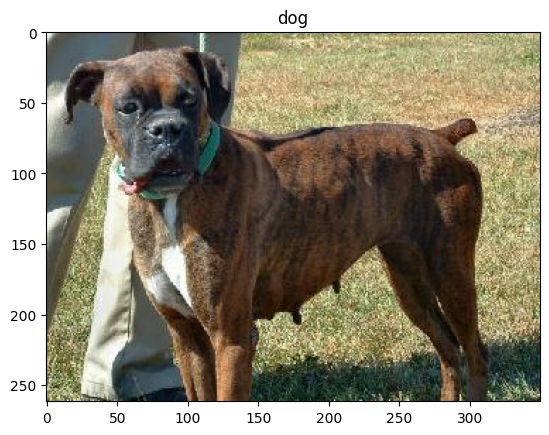

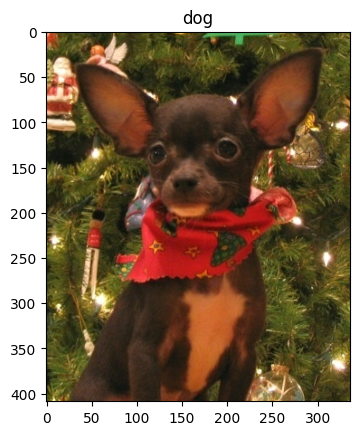

In [ ]:
get_label_name = metadata.features['label'].int2str #creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))



In [ ]:
IMG_SIZE = 160 #All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5)
  image = tf.image.resize(image,(IMG_SIZE, IMG_SIZE))
  return image, label

Now we can apply this function to all our images using map

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now

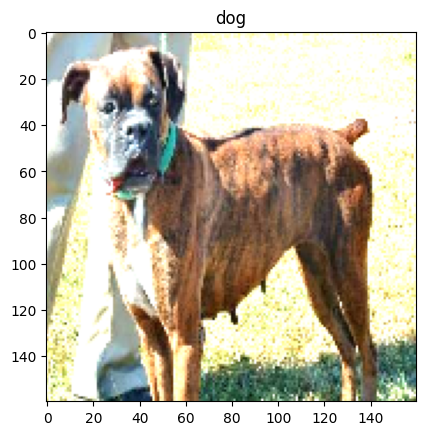

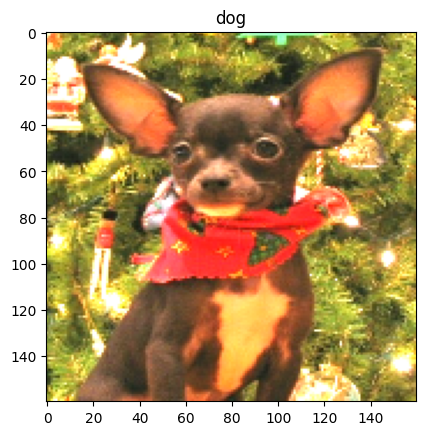

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

#Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top= False,
                                               weights= 'imagenet')



In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [ ]:
batch_size = 32
train_batches = train.batch(batch_size)
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)

In [ ]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#we can evaluate the model now to see how it does before training on our new images
initial_epochs = 3
validation_steps= 20
validation_batches= validation.batch(batch_size=32)

loss0,accuracy0 =model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 13s 531ms/step - loss: 0.7993 - accuracy: 0.4938


In [ ]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)
acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 370s 629ms/step - loss: 0.0894 - accuracy: 0.9672 - val_loss: 0.0664 - val_accuracy: 0.9768
Epoch 2/3
582/582 [==============================] - 338s 581ms/step - loss: 0.0596 - accuracy: 0.9786 - val_loss: 0.0629 - val_accuracy: 0.9794
Epoch 3/3
582/582 [==============================] - 338s 581ms/step - loss: 0.0545 - accuracy: 0.9808 - val_loss: 0.0618 - val_accuracy: 0.9798
[0.9672219157218933, 0.9785599112510681, 0.9807630181312561]


In [ ]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model("dogs_vs_cats.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
